## **Feature Engineering in the context of multiple linear regression:**

Here we will learn about generating new features that captures the essense of the relationship between the predictors and the response in a more meaningful way.

In [1]:
install.packages(c("ggplot2", "dplyr"))
library(ggplot2)
library(dplyr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading California housing data
file = "/content/SaratogaHouses.csv"
hData = read.csv(file, header = TRUE, stringsAsFactors = TRUE)
str(hData)

'data.frame':	1728 obs. of  16 variables:
 $ price          : int  132500 181115 109000 155000 86060 120000 153000 170000 90000 122900 ...
 $ lotSize        : num  0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ age            : int  42 0 133 13 0 31 33 23 36 4 ...
 $ landValue      : int  50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ livingArea     : int  906 1953 1944 1944 840 1152 2752 1662 1632 1416 ...
 $ pctCollege     : int  35 51 51 51 51 22 51 35 51 44 ...
 $ bedrooms       : int  2 3 4 3 2 4 4 4 3 3 ...
 $ fireplaces     : int  1 0 1 1 0 1 1 1 0 0 ...
 $ bathrooms      : num  1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5 ...
 $ rooms          : int  5 6 8 5 3 8 8 9 8 6 ...
 $ heating        : Factor w/ 3 levels "electric","hot air",..: 1 3 3 2 2 2 3 2 1 2 ...
 $ fuel           : Factor w/ 3 levels "electric","gas",..: 1 2 2 2 2 2 3 3 1 2 ...
 $ sewer          : Factor w/ 3 levels "none","public/commercial",..: 3 3 2 3 2 3 3 3 3 1 ...
 $ waterfront     : Factor w

In the above dataset, we are considering price as the response and the livingArea and age (both continuous) as the predictors.

In [3]:
# Building a linear regression model for price as a function of continuous predictors livingArea and age
model = lm(data = hData, price ~ livingArea + age)
summary(model)


Call:
lm(formula = price ~ livingArea + age, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-267300  -40485   -8491   27303  557613 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22951.791   5536.960   4.145 3.56e-05 ***
livingArea    111.277      2.713  41.019  < 2e-16 ***
age          -224.751     57.576  -3.904 9.84e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68820 on 1725 degrees of freedom
Multiple R-squared:  0.5118,	Adjusted R-squared:  0.5112 
F-statistic: 904.2 on 2 and 1725 DF,  p-value: < 2.2e-16


# **Centering**

We can observe a small issue in the above result. The intercept we get is not interpretable. For eg: if both the livingArea and age were 0, we will still have a non-zero intercept that is being predicted as the price of the house. This does not make sense.

Therefore, we will be centering the predictors with which our MLRM predicts:

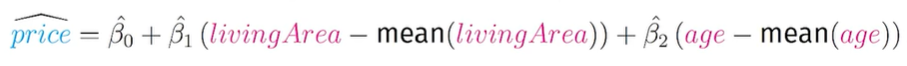

We do not have livingArea as our feature anymore but we will create a new feature by subtracting the mean/average of the livingArea from all the livingAreas which is called 'the mean-centered livingArea'.

Similarly, we will also subtract the mean/average of age from all the ages to get a new feature called 'the mean centered age'.

- If our mean `mean-centered livingArea` is 0, then we can see that the livingArea of all the houses in our dataset is exactly equal to the average.

- If our `mean centered age` is 0, then the age of all houses in our dataset is exactly equal to the average age.

This way our intercept(B0hat) can have a better meaning i.e., the B0hat is the average value of the price around the average value of livingArea and the average value of age.

So, if you are looking at a house whose livingArea is close to the average livingArea and age close to the average age than the predicted price of the house is actually close to B0hat.

In [4]:
# adding new columns for mean-centered features to our dataset
hData$livingAreaMC = hData$livingArea - mean(hData$livingArea)
hData$ageMC = hData$age - mean(hData$age)
str(hData)

'data.frame':	1728 obs. of  18 variables:
 $ price          : int  132500 181115 109000 155000 86060 120000 153000 170000 90000 122900 ...
 $ lotSize        : num  0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ age            : int  42 0 133 13 0 31 33 23 36 4 ...
 $ landValue      : int  50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ livingArea     : int  906 1953 1944 1944 840 1152 2752 1662 1632 1416 ...
 $ pctCollege     : int  35 51 51 51 51 22 51 35 51 44 ...
 $ bedrooms       : int  2 3 4 3 2 4 4 4 3 3 ...
 $ fireplaces     : int  1 0 1 1 0 1 1 1 0 0 ...
 $ bathrooms      : num  1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5 ...
 $ rooms          : int  5 6 8 5 3 8 8 9 8 6 ...
 $ heating        : Factor w/ 3 levels "electric","hot air",..: 1 3 3 2 2 2 3 2 1 2 ...
 $ fuel           : Factor w/ 3 levels "electric","gas",..: 1 2 2 2 2 2 3 3 1 2 ...
 $ sewer          : Factor w/ 3 levels "none","public/commercial",..: 3 3 2 3 2 3 3 3 3 1 ...
 $ waterfront     : Factor w

In [5]:
# Building a linear regression model for price as a function of mean-centered continuous predictors livingArea and age
model = lm(data = hData, price ~ livingAreaMC + ageMC)
summary(model)


Call:
lm(formula = price ~ livingAreaMC + ageMC, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-267300  -40485   -8491   27303  557613 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  211966.705   1655.583 128.031  < 2e-16 ***
livingAreaMC    111.277      2.713  41.019  < 2e-16 ***
ageMC          -224.751     57.576  -3.904 9.84e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68820 on 1725 degrees of freedom
Multiple R-squared:  0.5118,	Adjusted R-squared:  0.5112 
F-statistic: 904.2 on 2 and 1725 DF,  p-value: < 2.2e-16


Now, let's predict the house price for 0 input value. It will be the value of the intercept(B0hat) i.e., $211966.705.

In [6]:
# Predicting house price for zero input value of predictors
hData_test = data.frame(livingAreaMC = c(0), ageMC = c(0))
predict(model, hData_test)

1 
211966.7

In [9]:
# Average livingArea and age
mean(hData$livingArea)
mean(hData$age)

[1] 1754.976

[1] 27.91609

Here, we can see that the price of the house is around $211966.7 whose living area is close to 1754.97 square units and whose age is around 27.9 years.

### Important Note:
`Mean-centering only works for continuos predictors and does not apply to categorical predictors as there is no notion of mean/central value for a categorical variables.`

------

**Zero-Intercept model: **

If we also mean-center the resposne variablein addition to mean-centering the predictors than we will get a model where the intercept will be 0. This type of model is called `Zero-intercept model`.

# **Standardization**

Here, we will subtract the sample and divide by sample standard deviation ofthe predictors if there are different scales (units) present in them.

In [18]:
head(hData[c("livingArea", "lotSize")])

,livingArea,lotSize
,<int>,<dbl>
1,906,0.09
2,1953,0.92
3,1944,0.19
4,1944,0.41
5,840,0.11
6,1152,0.68


We can see that there is a ddifference in scale between these two predictors.

In [19]:
# Build a linear regression model for price as
# a function of continuous predictors livingArea and lotSize
# as it is without feature engineering
model = lm(data = hData, price ~ livingArea + lotSize)
summary(model)


Call:
lm(formula = price ~ livingArea + lotSize, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-278635  -39454   -7716   28449  554117 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12366.413   5002.835   2.472   0.0135 *  
livingArea    112.005      2.715  41.259   <2e-16 ***
lotSize      6064.513   2408.751   2.518   0.0119 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69000 on 1725 degrees of freedom
Multiple R-squared:  0.5093,	Adjusted R-squared:  0.5087 
F-statistic: 895.2 on 2 and 1725 DF,  p-value: < 2.2e-16


We can see that the estimate B1hat corresponding to livingArea is a lot smaller than the estimate B2hat corresponding to lotSize. The reason for this difference is that the living area is measure in squared feet and the lot size is measured in some unit that makes it appear smaller.

Therefore, to resolve this issue of differences in scale

In [20]:
# scaling the features using scale()
hData$livingAreaSD = scale(hData$livingArea)
hData$lotSizeSD = scale(hData$lotSize)
str(hData)

'data.frame':	1728 obs. of  20 variables:
 $ price          : int  132500 181115 109000 155000 86060 120000 153000 170000 90000 122900 ...
 $ lotSize        : num  0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ age            : int  42 0 133 13 0 31 33 23 36 4 ...
 $ landValue      : int  50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ livingArea     : int  906 1953 1944 1944 840 1152 2752 1662 1632 1416 ...
 $ pctCollege     : int  35 51 51 51 51 22 51 35 51 44 ...
 $ bedrooms       : int  2 3 4 3 2 4 4 4 3 3 ...
 $ fireplaces     : int  1 0 1 1 0 1 1 1 0 0 ...
 $ bathrooms      : num  1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5 ...
 $ rooms          : int  5 6 8 5 3 8 8 9 8 6 ...
 $ heating        : Factor w/ 3 levels "electric","hot air",..: 1 3 3 2 2 2 3 2 1 2 ...
 $ fuel           : Factor w/ 3 levels "electric","gas",..: 1 2 2 2 2 2 3 3 1 2 ...
 $ sewer          : Factor w/ 3 levels "none","public/commercial",..: 3 3 2 3 2 3 3 3 3 1 ...
 $ waterfront     : Factor w

In [21]:
head(hData[c('livingAreaSD','lotSizeSD')])

,livingAreaSD,lotSizeSD
,"<dbl[,1]>","<dbl[,1]>"
1,-1.3694580,-0.5871274
2,0.3194272,0.6008272
3,0.3049096,-0.4440004
4,0.3049096,-0.1291208
5,-1.4759207,-0.5585020
6,-0.9726425,0.2573223


In [22]:
# Build a linear regression model for price as a function of standardized continuous predictors livingArea and age
model = lm(data = hData, price ~ livingAreaSD + lotSizeSD)
summary(model)


Call:
lm(formula = price ~ livingAreaSD + lotSizeSD, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-278635  -39454   -7716   28449  554117 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    211967       1660 127.704   <2e-16 ***
livingAreaSD    69436       1683  41.259   <2e-16 ***
lotSizeSD        4237       1683   2.518   0.0119 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69000 on 1725 degrees of freedom
Multiple R-squared:  0.5093,	Adjusted R-squared:  0.5087 
F-statistic: 895.2 on 2 and 1725 DF,  p-value: < 2.2e-16


Here, we can see that the coefficient estimate of the livingArea is bigger was compared to our previous result which was done without standarizing the features.

The interpretation of the coefficient estimates have to be made with respect to the scaled predictor values. For example:
- We have our B1hat value as 69436 which is the approximate change in the house price for a 1 unit increase not in livingArea but in standardized livingArea value.

(If we are to increease 1 unit that it means that we are moving 1 standard deviation unit away from its mean of the living area.)

That'll be equal to 69436 where 1 unit increasse is not measures as 1 square feet unit.

# Logarithic Transformation

Sometimes we do not want our response variable to be predicted negatively. For eg, we do not want out response variable i.e., house price to come out as negative.

In [25]:
# creating a new column 'logprice'
hData$logprice = log(hData$price)
head(hData[c('price', 'logprice')])

,price,logprice
,<int>,<dbl>
1,132500,11.79434
2,181115,12.10689
3,109000,11.59910
4,155000,11.95118
5,86060,11.36280
6,120000,11.69525


In [27]:
# Building a linear regression model for log(price) as a function of continuous predictors livingArea and age
model = lm(data = hData, logprice ~ livingArea + age)
summary(model)


Call:
lm(formula = logprice ~ livingArea + age, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6583 -0.1734  0.0039  0.1736  1.7450 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.135e+01  2.624e-02 432.588  < 2e-16 ***
livingArea   4.896e-04  1.285e-05  38.085  < 2e-16 ***
age         -1.524e-03  2.728e-04  -5.586 2.69e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3261 on 1725 degrees of freedom
Multiple R-squared:  0.4819,	Adjusted R-squared:  0.4813 
F-statistic: 802.3 on 2 and 1725 DF,  p-value: < 2.2e-16


Here, we can see the coefficient estimate of livingArea (Bhat1) is approx. 4.896e-04.
- This means that if i were to increase the living area by 1 unit, then the proportional change in the house price is B1hat.

* proportional = (new - old )/old